In [ ]:
# 필수 라이브러리 설치 및 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Fashion-MNIST 데이터셋 로드
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.18MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 65.1MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.8MB/s]


In [ ]:
# 데이터로더 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# 클래스 이름 정의
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [ ]:
# 하이퍼파라미터 설정
batch_size = 64
learning_rate = 0.001
num_epochs = 15

In [ ]:
# CNN 모델 정의
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# 모델 생성 및 GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FashionCNN().to(device)

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 학습 함수
def train_model():
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 통계 계산
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    return train_loss, train_acc

In [ ]:
# 테스트 함수
def test_model():
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_acc = 100 * correct / total
    return test_loss, test_acc

In [ ]:
# 학습 및 테스트 실행
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(num_epochs):
    train_loss, train_acc = train_model()
    test_loss, test_acc = test_model()

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')


Epoch [1/15], Train Loss: 0.4679, Train Acc: 83.05%, Test Loss: 0.3314, Test Acc: 87.97%
Epoch [2/15], Train Loss: 0.3009, Train Acc: 89.06%, Test Loss: 0.2768, Test Acc: 89.66%
Epoch [3/15], Train Loss: 0.2551, Train Acc: 90.77%, Test Loss: 0.2513, Test Acc: 91.02%
Epoch [4/15], Train Loss: 0.2247, Train Acc: 91.86%, Test Loss: 0.2486, Test Acc: 90.66%
Epoch [5/15], Train Loss: 0.1993, Train Acc: 92.67%, Test Loss: 0.2506, Test Acc: 91.00%
Epoch [6/15], Train Loss: 0.1793, Train Acc: 93.37%, Test Loss: 0.2360, Test Acc: 91.80%
Epoch [7/15], Train Loss: 0.1615, Train Acc: 93.88%, Test Loss: 0.2365, Test Acc: 92.06%
Epoch [8/15], Train Loss: 0.1449, Train Acc: 94.61%, Test Loss: 0.2316, Test Acc: 92.10%
Epoch [9/15], Train Loss: 0.1307, Train Acc: 95.11%, Test Loss: 0.2427, Test Acc: 92.15%
Epoch [10/15], Train Loss: 0.1180, Train Acc: 95.53%, Test Loss: 0.2550, Test Acc: 92.05%
Epoch [11/15], Train Loss: 0.1080, Train Acc: 95.92%, Test Loss: 0.2630, Test Acc: 92.08%
Epoch [12/15], Trai

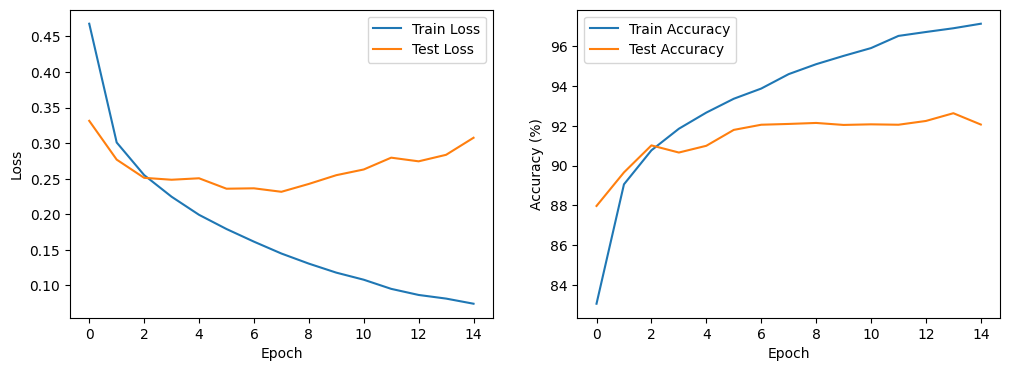

In [ ]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

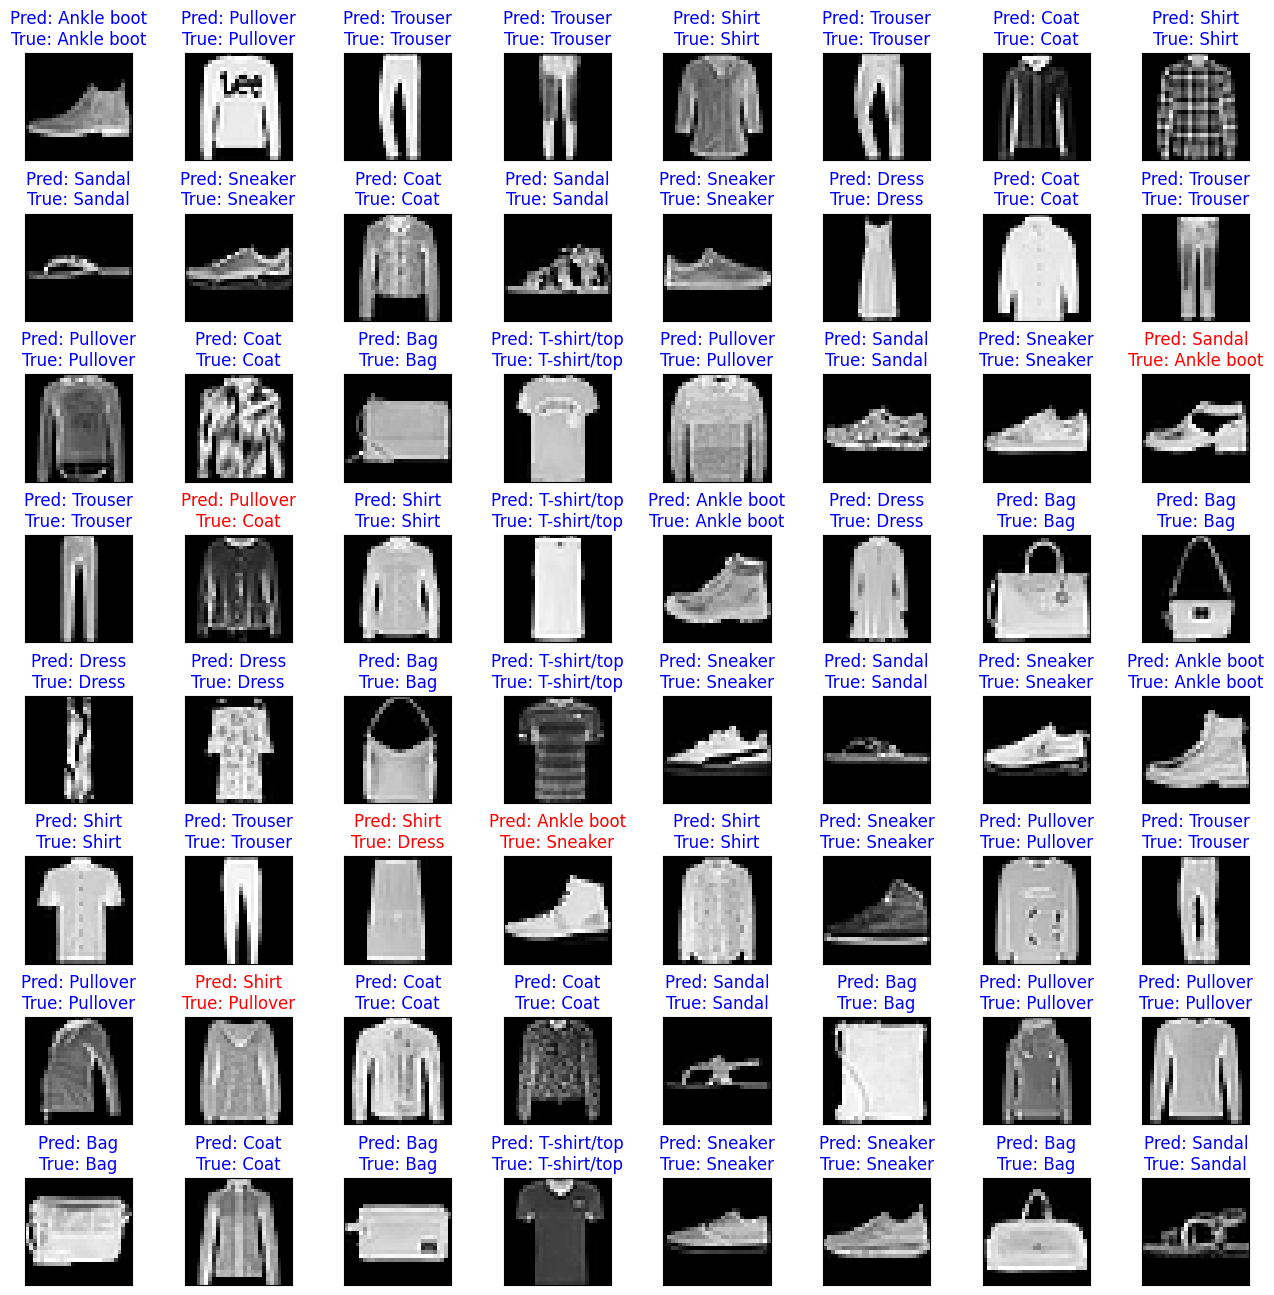

5x5 샘플 중 정확도: 59/64 (92.19%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#테스트할 개수(의 제곱근)
n=8


# 테스트 데이터에서 25개의 이미지 추출 (5x5 그리드)
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images[:n*n].to(device), labels[:n*n].to(device)  # 처음 25개만 선택

# 모델 예측
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# 이미지와 예측 결과 시각화
fig, axes = plt.subplots(n, n, figsize=(2*n, 2*n))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, ax in enumerate(axes.flat):
    # 이미지 표시 (정규화 해제)
    img = images[i].cpu().numpy()
    img = np.transpose(img, (1, 2, 0))  # (C, H, W) -> (H, W, C)
    img = img / 2 + 0.5  # 정규화 해제
    ax.imshow(img.squeeze(), cmap='gray')  # 흑백 이미지

    # 예측 결과와 실제 레이블 표시
    pred_label = classes[predicted[i]]
    true_label = classes[labels[i]]

    # 예측이 맞으면 파란색, 틀리면 빨간색으로 표시
    color = 'blue' if pred_label == true_label else 'red'
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

# 전체 정확도 계산
correct = (predicted == labels).sum().item()
total = labels.size(0)
print(f'5x5 샘플 중 정확도: {correct}/{total} ({100 * correct / total:.2f}%)')